In [4]:
#read data
lable = open("S71.dat")
next(lable)
taglist=[]
lablelist=[]
for line in lable:
    tag = line.split()[0]
    taglist.append(tag)
    lable = float(line.split()[1])
    if lable > 0.1:
        lable = 1
        lablelist.append(lable)
    if lable < 0.1:
        lable = 0
        lablelist.append(lable)
    
    
print(taglist,lablelist)

['A152S', 'A183T', 'A215P', 'A226P', 'A240V', 'A248P', 'A40P', 'A47W', 'A82V', 'D112R', 'D186H', 'D186W', 'D220E', 'E204K', 'E231M', 'E231R', 'G139N', 'G147T', 'G165A', 'G254V', 'G66A', 'H104F', 'I168R', 'I208V', 'K148W', 'K259F', 'K95A', 'L117F', 'M154F', 'N212R', 'N225V', 'N241L', 'N246W', 'N37P', 'P181A', 'P210K', 'P217L', 'Q119Y', 'Q133Y', 'Q182L', 'Q228V', 'Q91P', 'R100F', 'R123V', 'R280A', 'R90D', 'S125R', 'S136Q', 'S141P', 'S166T', 'S175W', 'S187P', 'S187W', 'S188Q', 'S193R', 'S238F', 'S54W', 'S92P', 'T113P', 'T116P', 'T140D', 'T151P', 'T198V', 'T266P', 'T279P', 'T286V', 'T51P', 'T77E', 'T77P', 'V134L', 'W159H'] [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]


In [55]:
import numpy as np
y = np.array(lablelist)

In [56]:
import pandas as pd

df=pd.read_csv('independentS71.dat', sep=',')

In [57]:
x = df.values

In [58]:
x.shape

(71, 29)

In [59]:
y.shape

(71,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibili

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
W0620 16:31:00.853215 4691750336 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 16:31:00.868937 4691750336 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 240       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 240       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 330
Trainable params: 330
Non-trainable params: 0
______________

In [64]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=200,
                                 verbose=2,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Train on 35 samples, validate on 36 samples
Epoch 1/200
 - 1s - loss: 1.0469 - acc: 0.3714 - val_loss: 0.8206 - val_acc: 0.4722
Epoch 2/200
 - 0s - loss: 0.9979 - acc: 0.4000 - val_loss: 0.8109 - val_acc: 0.4722
Epoch 3/200
 - 0s - loss: 0.9597 - acc: 0.4000 - val_loss: 0.8007 - val_acc: 0.4167
Epoch 4/200
 - 0s - loss: 0.9191 - acc: 0.4571 - val_loss: 0.7929 - val_acc: 0.3889
Epoch 5/200
 - 0s - loss: 0.8800 - acc: 0.4571 - val_loss: 0.7869 - val_acc: 0.3611
Epoch 6/200
 - 0s - loss: 0.8483 - acc: 0.4571 - val_loss: 0.7818 - val_acc: 0.3889
Epoch 7/200
 - 0s - loss: 0.8140 - acc: 0.4857 - val_loss: 0.7779 - val_acc: 0.4167
Epoch 8/200
 - 0s - loss: 0.7902 - acc: 0.5143 - val_loss: 0.7754 - val_acc: 0.4444
Epoch 9/200
 - 0s - loss: 0.7567 - acc: 0.5143 - val_loss: 0.7743 - val_acc: 0.4444
Epoch 10/200
 - 0s - loss: 0.7368 - acc: 0.5143 - val_loss: 0.7725 - val_acc: 0.4722
Epoch 11/200
 - 0s - loss: 0.7075 - acc: 0.5714 - val_loss: 0.7730 - val_acc: 0.5000
Epoch 12/2

Epoch 97/200
 - 0s - loss: 0.3617 - acc: 0.8000 - val_loss: 1.0156 - val_acc: 0.5556
Epoch 98/200
 - 0s - loss: 0.3612 - acc: 0.8000 - val_loss: 1.0190 - val_acc: 0.5556
Epoch 99/200
 - 0s - loss: 0.3604 - acc: 0.8000 - val_loss: 1.0218 - val_acc: 0.5556
Epoch 100/200
 - 0s - loss: 0.3592 - acc: 0.8000 - val_loss: 1.0240 - val_acc: 0.5278
Epoch 101/200
 - 0s - loss: 0.3587 - acc: 0.8000 - val_loss: 1.0267 - val_acc: 0.5278
Epoch 102/200
 - 0s - loss: 0.3581 - acc: 0.8000 - val_loss: 1.0291 - val_acc: 0.5278
Epoch 103/200
 - 0s - loss: 0.3576 - acc: 0.8000 - val_loss: 1.0316 - val_acc: 0.5278
Epoch 104/200
 - 0s - loss: 0.3569 - acc: 0.8000 - val_loss: 1.0351 - val_acc: 0.5278
Epoch 105/200
 - 0s - loss: 0.3559 - acc: 0.8000 - val_loss: 1.0374 - val_acc: 0.5278
Epoch 106/200
 - 0s - loss: 0.3556 - acc: 0.8000 - val_loss: 1.0412 - val_acc: 0.5278
Epoch 107/200
 - 0s - loss: 0.3540 - acc: 0.8000 - val_loss: 1.0438 - val_acc: 0.5278
Epoch 108/200
 - 0s - loss: 0.3544 - acc: 0.8000 - val_lo

Epoch 193/200
 - 0s - loss: 0.3226 - acc: 0.8000 - val_loss: 1.2736 - val_acc: 0.5556
Epoch 194/200
 - 0s - loss: 0.3231 - acc: 0.8000 - val_loss: 1.2764 - val_acc: 0.5556
Epoch 195/200
 - 0s - loss: 0.3221 - acc: 0.8000 - val_loss: 1.2789 - val_acc: 0.5556
Epoch 196/200
 - 0s - loss: 0.3221 - acc: 0.8000 - val_loss: 1.2808 - val_acc: 0.5556
Epoch 197/200
 - 0s - loss: 0.3227 - acc: 0.8000 - val_loss: 1.2842 - val_acc: 0.5556
Epoch 198/200
 - 0s - loss: 0.3219 - acc: 0.8000 - val_loss: 1.2870 - val_acc: 0.5556
Epoch 199/200
 - 0s - loss: 0.3213 - acc: 0.8000 - val_loss: 1.2891 - val_acc: 0.5556
Epoch 200/200
 - 0s - loss: 0.3220 - acc: 0.7714 - val_loss: 1.2903 - val_acc: 0.5556
Test loss: 1.2903163962894015
Test accuracy: 0.5555555555555556
Model name: model_2
Train on 35 samples, validate on 36 samples
Epoch 1/200
 - 1s - loss: 0.8224 - acc: 0.6000 - val_loss: 0.7161 - val_acc: 0.5833
Epoch 2/200
 - 0s - loss: 0.8016 - acc: 0.6000 - val_loss: 0.7072 - val_acc: 0.5833
Epoch 3/200
 - 0

Epoch 88/200
 - 0s - loss: 0.3693 - acc: 0.8000 - val_loss: 1.1095 - val_acc: 0.4722
Epoch 89/200
 - 0s - loss: 0.3691 - acc: 0.8000 - val_loss: 1.1152 - val_acc: 0.4722
Epoch 90/200
 - 0s - loss: 0.3681 - acc: 0.8000 - val_loss: 1.1221 - val_acc: 0.4722
Epoch 91/200
 - 0s - loss: 0.3661 - acc: 0.8000 - val_loss: 1.1302 - val_acc: 0.4722
Epoch 92/200
 - 0s - loss: 0.3652 - acc: 0.8000 - val_loss: 1.1371 - val_acc: 0.4722
Epoch 93/200
 - 0s - loss: 0.3635 - acc: 0.8000 - val_loss: 1.1433 - val_acc: 0.4722
Epoch 94/200
 - 0s - loss: 0.3635 - acc: 0.8000 - val_loss: 1.1495 - val_acc: 0.4722
Epoch 95/200
 - 0s - loss: 0.3624 - acc: 0.8000 - val_loss: 1.1531 - val_acc: 0.4722
Epoch 96/200
 - 0s - loss: 0.3610 - acc: 0.8000 - val_loss: 1.1607 - val_acc: 0.4722
Epoch 97/200
 - 0s - loss: 0.3597 - acc: 0.8000 - val_loss: 1.1658 - val_acc: 0.4722
Epoch 98/200
 - 0s - loss: 0.3584 - acc: 0.8000 - val_loss: 1.1720 - val_acc: 0.4722
Epoch 99/200
 - 0s - loss: 0.3573 - acc: 0.8000 - val_loss: 1.178

Epoch 184/200
 - 0s - loss: 0.3191 - acc: 0.8286 - val_loss: 1.5097 - val_acc: 0.5000
Epoch 185/200
 - 0s - loss: 0.3183 - acc: 0.8286 - val_loss: 1.5133 - val_acc: 0.5000
Epoch 186/200
 - 0s - loss: 0.3182 - acc: 0.8286 - val_loss: 1.5153 - val_acc: 0.5000
Epoch 187/200
 - 0s - loss: 0.3185 - acc: 0.8000 - val_loss: 1.5163 - val_acc: 0.5000
Epoch 188/200
 - 0s - loss: 0.3185 - acc: 0.7714 - val_loss: 1.5196 - val_acc: 0.4722
Epoch 189/200
 - 0s - loss: 0.3191 - acc: 0.8000 - val_loss: 1.5189 - val_acc: 0.4722
Epoch 190/200
 - 0s - loss: 0.3175 - acc: 0.8286 - val_loss: 1.5255 - val_acc: 0.4722
Epoch 191/200
 - 0s - loss: 0.3176 - acc: 0.7714 - val_loss: 1.5289 - val_acc: 0.5000
Epoch 192/200
 - 0s - loss: 0.3178 - acc: 0.8000 - val_loss: 1.5278 - val_acc: 0.5000
Epoch 193/200
 - 0s - loss: 0.3168 - acc: 0.8286 - val_loss: 1.5314 - val_acc: 0.5000
Epoch 194/200
 - 0s - loss: 0.3176 - acc: 0.8286 - val_loss: 1.5356 - val_acc: 0.5000
Epoch 195/200
 - 0s - loss: 0.3169 - acc: 0.8286 - val

Epoch 79/200
 - 0s - loss: 0.3558 - acc: 0.8286 - val_loss: 1.1927 - val_acc: 0.4444
Epoch 80/200
 - 0s - loss: 0.3519 - acc: 0.8286 - val_loss: 1.2065 - val_acc: 0.4444
Epoch 81/200
 - 0s - loss: 0.3495 - acc: 0.8000 - val_loss: 1.2191 - val_acc: 0.4167
Epoch 82/200
 - 0s - loss: 0.3474 - acc: 0.8286 - val_loss: 1.2308 - val_acc: 0.4167
Epoch 83/200
 - 0s - loss: 0.3456 - acc: 0.8286 - val_loss: 1.2424 - val_acc: 0.4167
Epoch 84/200
 - 0s - loss: 0.3443 - acc: 0.8000 - val_loss: 1.2536 - val_acc: 0.4167
Epoch 85/200
 - 0s - loss: 0.3426 - acc: 0.8000 - val_loss: 1.2651 - val_acc: 0.4167
Epoch 86/200
 - 0s - loss: 0.3410 - acc: 0.8286 - val_loss: 1.2740 - val_acc: 0.4167
Epoch 87/200
 - 0s - loss: 0.3394 - acc: 0.8286 - val_loss: 1.2877 - val_acc: 0.4167
Epoch 88/200
 - 0s - loss: 0.3373 - acc: 0.8286 - val_loss: 1.3014 - val_acc: 0.4167
Epoch 89/200
 - 0s - loss: 0.3375 - acc: 0.8286 - val_loss: 1.3129 - val_acc: 0.4167
Epoch 90/200
 - 0s - loss: 0.3359 - acc: 0.8286 - val_loss: 1.327

Epoch 175/200
 - 0s - loss: 0.2893 - acc: 0.8286 - val_loss: 1.9430 - val_acc: 0.4167
Epoch 176/200
 - 0s - loss: 0.2904 - acc: 0.8286 - val_loss: 1.9424 - val_acc: 0.4167
Epoch 177/200
 - 0s - loss: 0.2905 - acc: 0.8000 - val_loss: 1.9488 - val_acc: 0.4167
Epoch 178/200
 - 0s - loss: 0.2904 - acc: 0.8000 - val_loss: 1.9557 - val_acc: 0.4444
Epoch 179/200
 - 0s - loss: 0.2893 - acc: 0.7714 - val_loss: 1.9589 - val_acc: 0.4167
Epoch 180/200
 - 0s - loss: 0.2908 - acc: 0.8000 - val_loss: 1.9631 - val_acc: 0.4444
Epoch 181/200
 - 0s - loss: 0.2888 - acc: 0.8000 - val_loss: 1.9672 - val_acc: 0.4444
Epoch 182/200
 - 0s - loss: 0.2887 - acc: 0.8000 - val_loss: 1.9707 - val_acc: 0.4167
Epoch 183/200
 - 0s - loss: 0.2927 - acc: 0.7429 - val_loss: 1.9784 - val_acc: 0.4722
Epoch 184/200
 - 0s - loss: 0.2902 - acc: 0.7714 - val_loss: 1.9781 - val_acc: 0.4167
Epoch 185/200
 - 0s - loss: 0.2894 - acc: 0.8286 - val_loss: 1.9798 - val_acc: 0.4167
Epoch 186/200
 - 0s - loss: 0.2881 - acc: 0.8286 - val

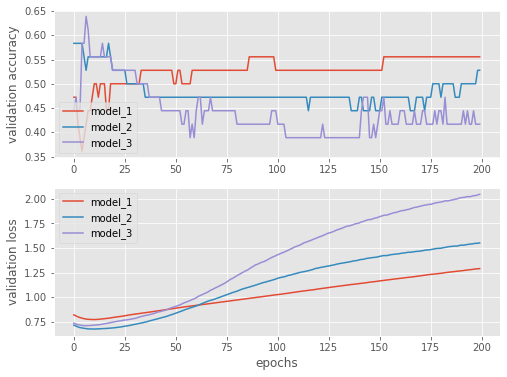

In [67]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

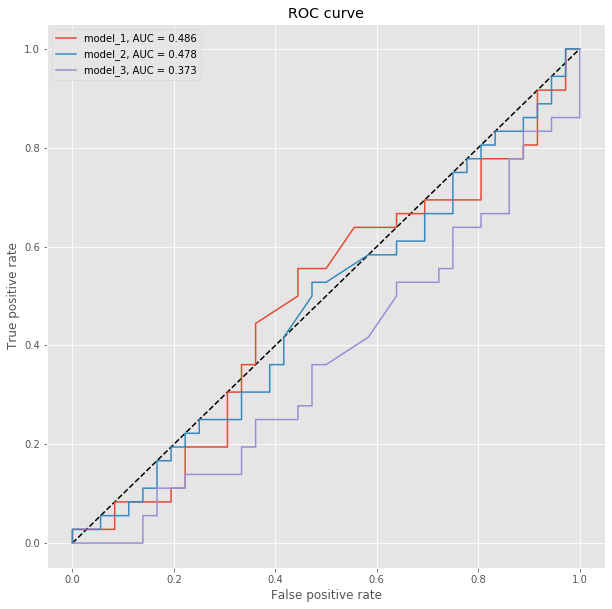

In [68]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.51 (+/- 0.14)
